# First questions

## Import libraries and dataset

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\mca\Desktop\mldatasets-08nov2023\mtcars.csv")
df.sample(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [38]:
# Meta data
print("Metadata")
print("No. of columns: ", df.columns.shape[0])
print("Column names: ", df.columns.values)
print("Total null values: ", df.isnull().sum().sum())
print("Column-wise null values:")
print(df.isnull().sum())
print("\nDescription of data")
df.describe()

Metadata
No. of columns:  12
Column names:  ['model' 'mpg' 'cyl' 'disp' 'hp' 'drat' 'wt' 'qsec' 'vs' 'am' 'gear'
 'carb']
Total null values:  0
Column-wise null values:
model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

Description of data


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### 1. Car with best and worst mpg

In [15]:
best_mpg = df[df['mpg'] == df['mpg'].max()]
worst_mpg = df[df['mpg'] == df['mpg'].min()]
print('Car with best mpg', best_mpg['model'].values,)
print('Car with worst mpg', worst_mpg['model'].values )

Car with best mpg ['Toyota Corolla']
Car with worst mpg ['Cadillac Fleetwood' 'Lincoln Continental']


In [16]:
best_mpg

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [17]:
worst_mpg

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4


### 2. Car with the worst horsepower

In [18]:
worst_hp = df[df['hp'] == df['hp'].min()]
worst_hp

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


### 3. Find the 5 number summary and draw the boxplot of displacement

Five number summary for displacement

Minimum:  71.1	Q1:  120.825	Mean/Q2:  230.72187500000004	Q3:  326.0	Maximum:  472.0	

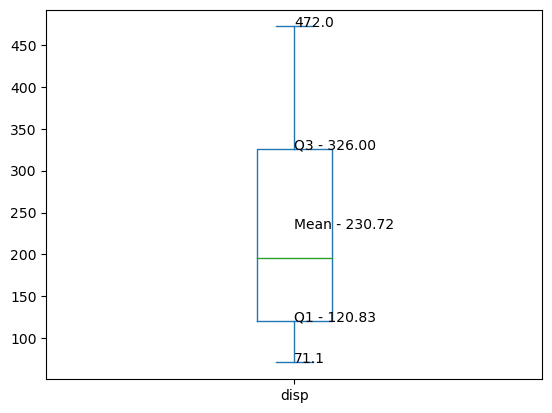

In [65]:
q1 = df['disp'].quantile(.25)
mean = df['disp'].mean()
q3 = df['disp'].quantile(.75)
min_ = df['disp'].min()
max_ = df['disp'].max()

print("Five number summary for displacement\n")
print("Minimum: ", min_, end='\t')
print("Q1: ", q1, end='\t')
print("Mean/Q2: ", mean, end='\t')
print("Q3: ", q3, end='\t')
print("Maximum: ", max_, end='\t')

df['disp'].plot(kind='box')
plt.annotate(max_, (1, max_))
plt.annotate(min_, (1, min_))
plt.annotate("Mean - %.2f"%mean, (1, mean))
plt.annotate("Q1 - %.2f"%q1, (1, q1))
plt.annotate("Q3 - %.2f"%q3, (1, q3))
plt.show()

### 4) Draw a histogram for MPG and comment on the distribution. 

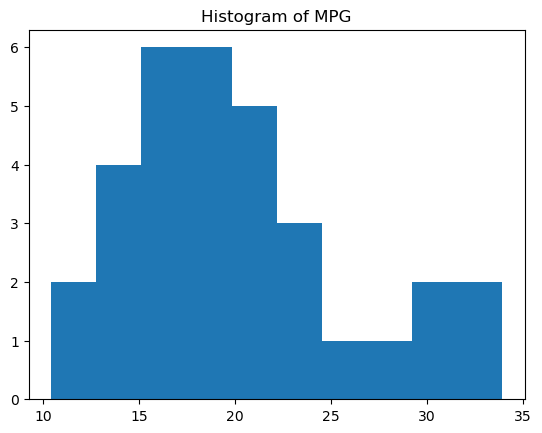

In [148]:
plt.hist(df['mpg'])
plt.title('Histogram of MPG')
plt.show()

#### Histogram shows that the most of the MPG of cars lies in the range of 15-20

### 5) What is average MPG for manual vs. automatic cars?

In [77]:
man_cars = df[df['am'] == 0]
auto_cars = df[df['am'] == 1]
man_cars.sample(4)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [78]:
auto_cars.sample(4)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2


In [80]:
print("Average MPG for manual cars: ", man_cars['mpg'].mean())
print("Average MPG for automatic cars: ", auto_cars['mpg'].mean())

Average MPG for manual cars:  17.147368421052633
Average MPG for automatic cars:  24.39230769230769


### 6) Draw a side by side box plot of fuel efficiency (MPG) for transmission ( manual vs. automatic) cars. Analyze and write about fuel efficiency in each group (manual vs. automatic). 

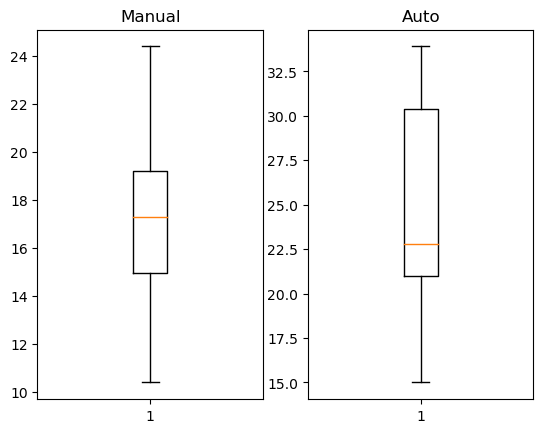

In [111]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(man_cars['mpg'])
axs[0].set_title("Manual")
    
axs[1].boxplot(auto_cars['mpg'])
axs[1].set_title("Auto")

plt.show()

#### The mean fuel efficiency of Manual is lower than the Fuel efficiency of Auto
#### Fuel efficiency of manual varies from a range of 15 to 19
#### While fuel efficiency of auto varies from a range of 21 to 30.5

### 8) Draw a side by side box plot of fuel efficiency for number of gears. Analyze and write about fuel efficiency and number of gears. 

In [118]:
# Finding out possible values for number of gears
df['gear'].unique().tolist()

[4, 3, 5]

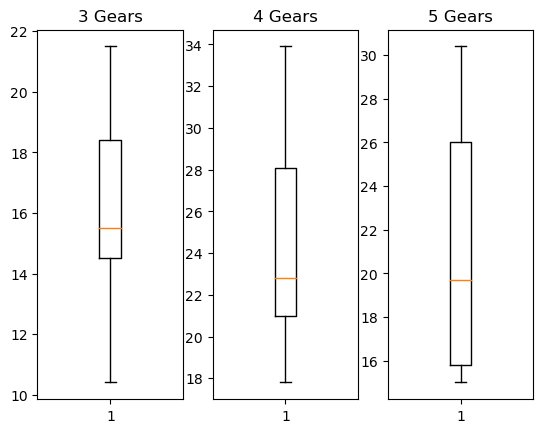

In [124]:
# plotting for 4, 3, 5

three_gear = df[df['gear'] == 3]
four_gear = df[df['gear'] == 4]
five_gear = df[df['gear'] == 5]

fig, axis = plt.subplots(1, 3)

axis[0].boxplot(three_gear['mpg'])
axis[0].set_title("3 Gears")

axis[1].boxplot(four_gear['mpg'])
axis[1].set_title("4 Gears")

axis[2].boxplot(five_gear['mpg'])
axis[2].set_title("5 Gears")

plt.show()

#### From the given graph we can see that
* 3 Geared cars have the minimum fuel efficiency 
* 4 Geared cars have a higher average fuel efficiency
* 5 Geared car's fuel efficiency varries the most, varrying from 16 to 26

### 9) Create a crosstab displaying horse power and number of cylinders and explain the relationship between the two attributes.

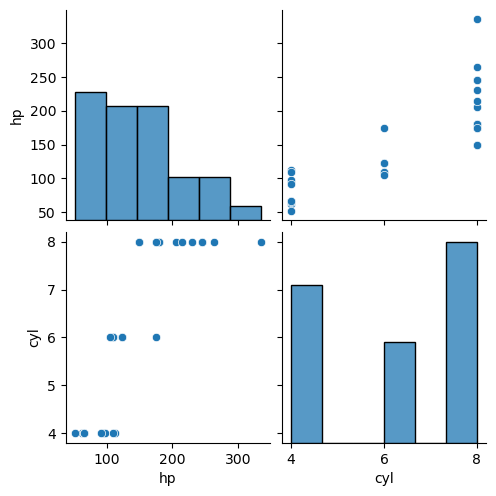

In [128]:
sns.pairplot(df[['hp', 'cyl']])

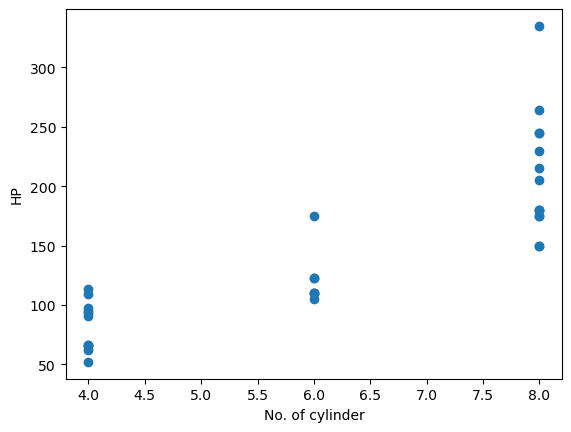

In [137]:
plt.scatter(df['cyl'],df['hp'])
plt.ylabel('HP')
plt.xlabel('No. of cylinder')
plt.show()

<AxesSubplot:>

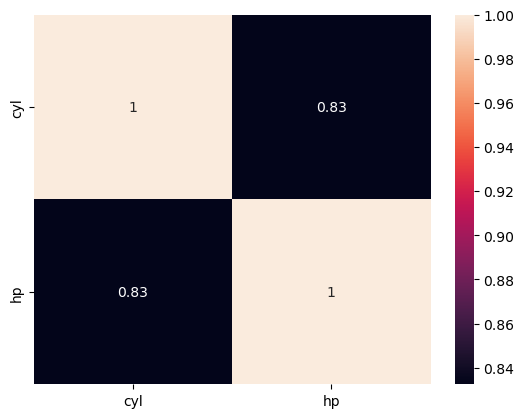

In [138]:
cmat = df[['cyl','hp']].corr()
sns.heatmap(cmat, annot=True,)

#### From the following plots we can understand as no. of cylinders increase the Horse Power also increases, hence they are in a positive co relation

### 10) Draw a scatter plot to understand the relationship between displacement and gross horse power. Use the correlation coefficient and infer the relationship.


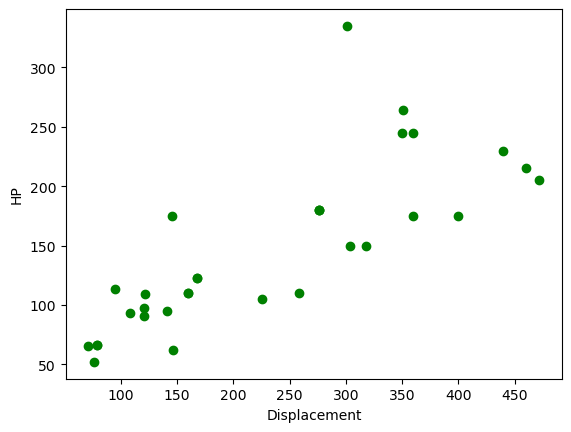

In [140]:
plt.scatter(df['disp'],df['hp'], color="Green")
plt.ylabel('HP')
plt.xlabel('Displacement')
plt.show()

          disp        hp
disp  1.000000  0.790949
hp    0.790949  1.000000


<AxesSubplot:>

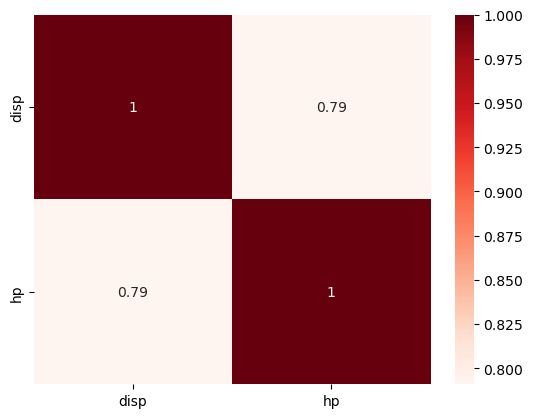

In [146]:
mat = df[['disp', 'hp']].corr()
print(mat)
sns.heatmap(mat, annot=True, cmap='Reds')

#### Horse Power and Displacement have 0.79 person's correlation, therefore we can infer that they have a postive corelation

# Second Question

## Importing libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


### Iris Dataset

In [159]:
dataset = r"C:\Users\mca\Desktop\mldatasets-08nov2023\iris.csv"
df = pd.read_csv(dataset)
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
11,12,4.8,3.4,1.6,0.2,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
119,120,6.0,2.2,5.0,1.5,Iris-virginica
124,125,6.7,3.3,5.7,2.1,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica


In [161]:
## Metadata
print("Metadata")
print("No. of columns: ", df.columns.shape[0])
print("Column names: ", df.columns.values)
print("Target column and values: ", 'Species', df['Species'].unique())
print("Total null values: ", df.isnull().sum().sum())
print("Column-wise null values:")
print(df.isnull().sum())
print("\nDescription of data")
df.describe()

Metadata
No. of columns:  6
Column names:  ['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'
 'Species']
Target column and values:  Species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Total null values:  0
Column-wise null values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Description of data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [166]:
# No null values, so skipping fillna
# Dropping ID
df.drop(columns=['Id'], inplace=True)

In [167]:
X = df.drop(columns=['Species'])
y = df[['Species']]
X.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
52,6.9,3.1,4.9,1.5
11,4.8,3.4,1.6,0.2
41,4.5,2.3,1.3,0.3
126,6.2,2.8,4.8,1.8
35,5.0,3.2,1.2,0.2


In [169]:
# No need for Scaling
# Label Encoding
le = LabelEncoder()
le_y = le.fit_transform(y)

In [186]:
exl = []

#### Train test split 50, 50

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,le_y, test_size=0.5, shuffle=True, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((75, 4), (75,), (75, 4), (75,))

In [187]:
# KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.5,
    "neighbours": 2,
    "accuracy": knn_accuracy,
    
})

Accuracy:  0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [189]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.5,
    "neighbours": 3,
    "accuracy": knn_accuracy,
    
})

Accuracy:  0.9733333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [190]:
# KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.5,
    "neighbours": 4,
    "accuracy": knn_accuracy,
    
})

Accuracy:  0.9333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [195]:
exl_df = pd.DataFrame(exl)
exl_df.to_excel("knn_neighbour_var.xlsx")
exl_df

,dataset,model,split_size,neighbours,accuracy
0,iris,knn,0.5,2,0.960000
1,iris,knn,0.5,3,0.973333
2,iris,knn,0.5,4,0.933333


In [196]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "Decision Tree",
    "split_size": 0.5,
    "accuracy": dt_acc,
    
})

Accuracy:  0.9466666666666667


In [198]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "NB",
    "split_size": 0.5,
    "accuracy": nb_acc,
    
})

Accuracy:  0.9466666666666667


In [200]:
exl_df = pd.DataFrame(exl)
exl_df.to_excel("iris_only.xlsx")
exl_df

,dataset,model,split_size,neighbours,accuracy
0,iris,knn,0.5,2.0,0.960000
1,iris,knn,0.5,3.0,0.973333
2,iris,knn,0.5,4.0,0.933333
3,iris,Decision Tree,0.5,NaN,0.946667
4,iris,NB,0.5,NaN,0.986667


#### Train test split 70, 30

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,le_y, test_size=0.3, shuffle=True, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((105, 4), (105,), (45, 4), (45,))

In [202]:
# KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 2,
    "accuracy": knn_accuracy,
    
})

Accuracy:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [201]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 3,
    "accuracy": knn_accuracy,
    
})

Accuracy:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [203]:
# KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 4,
    "accuracy": knn_accuracy,
    
})

Accuracy:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [204]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "NB",
    "split_size": 0.3,
    "accuracy": nb_acc,
    
})

Accuracy:  0.9466666666666667


Accuracy:  1.0


<AxesSubplot:>

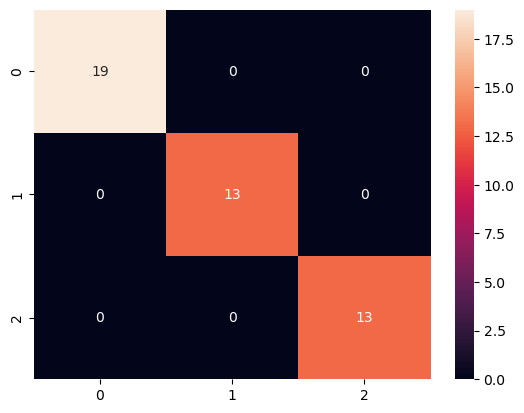

In [207]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "Decision Tree",
    "split_size": 0.3,
    "accuracy": dt_acc,
    
})
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True)

In [206]:
exl_df = pd.DataFrame(exl)
exl_df.to_excel("iris_only_with_split.xlsx")
exl_df

,dataset,model,split_size,neighbours,accuracy
0,iris,knn,0.5,2.0,0.960000
1,iris,knn,0.5,3.0,0.973333
2,iris,knn,0.5,4.0,0.933333
3,iris,Decision Tree,0.5,NaN,0.946667
4,iris,NB,0.5,NaN,0.986667
5,iris,knn,0.3,3.0,1.000000
6,iris,knn,0.3,2.0,1.000000
7,iris,knn,0.3,4.0,1.000000
8,iris,NB,0.3,NaN,0.977778
9,iris,Decision Tree,0.3,NaN,1.000000


In [208]:
dataset = r"C:\Users\mca\Desktop\mldatasets-08nov2023\wine.csv"
df = pd.read_csv(dataset)
df.sample(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
159,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562


In [209]:
## Metadata
print("Metadata")
print("No. of columns: ", df.columns.shape[0])
print("Column names: ", df.columns.values)
print("Target column and values: ", 'Wine', df['Wine'].unique())
print("Total null values: ", df.isnull().sum().sum())
print("Column-wise null values:")
print(df.isnull().sum())
print("\nDescription of data")
df.describe()

Metadata
No. of columns:  14
Column names:  ['Wine' 'Alcohol' 'Malic.acid' 'Ash' 'Acl' 'Mg' 'Phenols' 'Flavanoids'
 'Nonflavanoid.phenols' 'Proanth' 'Color.int' 'Hue' 'OD' 'Proline']
Target column and values:  Wine [1 2 3]
Total null values:  0
Column-wise null values:
Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

Description of data


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,le_y, test_size=0.3, shuffle=True, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((105, 4), (105,), (45, 4), (45,))

In [212]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"wine",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 3,
    "accuracy": knn_accuracy,
    
})

Accuracy:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [213]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"wine",
    "model": "NB",
    "split_size": 0.3,
    "accuracy": nb_acc,
    
})

Accuracy:  1.0


Accuracy:  1.0


<AxesSubplot:>

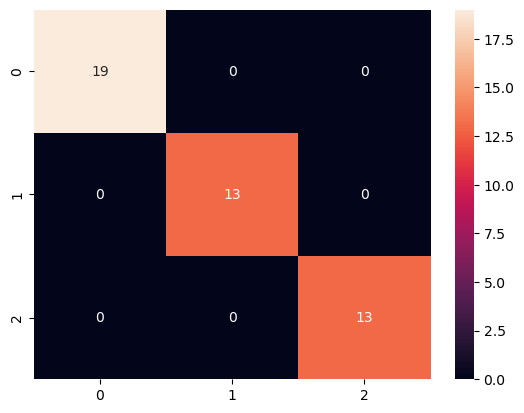

In [215]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"wine",
    "model": "Decision Tree",
    "split_size": 0.3,
    "accuracy": dt_acc,
    
})
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True)